*Конфигурируем Jupyter*

In [1240]:
%config InteractiveShell.ast_node_interactivity = 'all'

*Импортируем модули*

In [1241]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

*Загружаем данные*

In [1242]:
df = pd.read_csv('data/flavors_of_cacao.csv', delimiter=',')

print('Выборка для наглядности:')
df.head()

Выборка для наглядности:


,Company (Maker-if known),Specific Bean Originor Bar Name,REF,Review Date,Cocoa Percent,Company Location,Rating,Bean Type,Broad Bean Origin
0,A. Morin,Agua Grande,1876,2016,63%,France,3.75,,Sao Tome
1,A. Morin,Kpime,1676,2015,70%,France,2.75,,Togo
2,A. Morin,Atsane,1676,2015,70%,France,3.00,,Togo
3,A. Morin,Akata,1680,2015,70%,France,3.50,,Togo
4,A. Morin,Quilla,1704,2015,70%,France,3.50,,Peru


**Задание 1.** Сгруппировать оценки по:
<br><br>
a. Годам проведения дегустации (Review Date)
<br>
b. Первой цифре поля REF
<br>
c. Стране компании (Company Location)
<br>
d. Происхождению какао-бобов (Broad Bean Origin)

*__Этап 1.__ Выполним группировку рейтинга (Rating) в соответствии с частями задания*

In [1243]:
# a. Выполним группировку рейтинга (Rating) по годам проведения дегустации (Review Date)
review_grouped_rating = df.groupby('Review Date')['Rating']
# b. Выполним группировку рейтинга (Rating) по первой цифре поля REF
ref_grouped_rating = df.groupby([str(w)[0] for w in df['REF']])['Rating']
# c. Выполним группировку рейтинга (Rating) по стране происхождения (Company Location)
company_grouped_rating = df.groupby('Company Location')['Rating']
# d. Выполним группировку рейтинга (Rating) по происхождению какао-бобов (Broad Bean Origin)
origin_grouped_rating = df.groupby('Broad Bean Origin')['Rating']

**Задание 2.** Оценить: дисперсию, среднее, медианное и СКО поля "Rating" для каждого поля отдельно. Сравнить с аналогичными показателями общего поля "Rating" (по всему списку). Результат представить в удобном для восприятия виде, например, таблицей

*__Этап 1.__ Рассчитаем дисперсию (var), среднее (mean), медианное (median) и СКО (std) рейтинга (Rating) для каждого группировочного основания (см. <u>задание 1</u>)*

*a. Рассчитаем показатели рейтинга (Rating), сгруппированного по годам проведения дегустации (Review Date)*

In [1244]:
review_basis_measure = review_grouped_rating.agg(['var', 'std', 'mean', 'median']).dropna().round(2)
review_basis_measure.head()

,var,std,mean,median
Review Date,,,,
2006,0.59,0.77,3.12,3.00
2007,0.49,0.70,3.16,3.00
2008,0.30,0.54,2.99,3.00
2009,0.21,0.46,3.07,3.00
2010,0.22,0.47,3.15,3.25


*b. Рассчитаем показатели рейтинга (Rating), сгруппированного по первой цифре поля REF*

In [1245]:
ref_basis_measure = ref_grouped_rating.agg(['var', 'std', 'mean', 'median']).dropna().round(2)
ref_basis_measure.index.name = 'REF First Number'
ref_basis_measure.head()

,var,std,mean,median
REF First Number,,,,
1,0.20,0.44,3.21,3.25
2,0.32,0.56,3.01,3.00
3,0.27,0.52,3.13,3.00
4,0.29,0.54,3.07,3.00
5,0.22,0.47,3.16,3.25


*c. Рассчитаем показатели рейтинга (Rating), сгруппированного по стране компании (Company Location)*

In [1246]:
company_basis_measure = company_grouped_rating.agg(['var', 'std', 'mean', 'median']).dropna().round(2)
company_basis_measure.head()

,var,std,mean,median
Company Location,,,,
Amsterdam,0.04,0.20,3.50,3.50
Argentina,0.12,0.35,3.31,3.50
Australia,0.17,0.42,3.36,3.50
Austria,0.11,0.33,3.24,3.25
Belgium,0.67,0.82,3.09,3.25


*d. Рассчитаем показатели рейтинга (Rating), сгруппированного по происхождению какао-бобов (Broad Bean Origin)*

In [1247]:
origin_basis_measure = origin_grouped_rating.agg(['var', 'std', 'mean', 'median']).dropna().round(2)
origin_basis_measure.head()

,var,std,mean,median
Broad Bean Origin,,,,
Australia,0.25,0.50,3.25,3.25
Belize,0.10,0.32,3.23,3.25
Bolivia,0.18,0.42,3.20,3.25
Brazil,0.17,0.42,3.28,3.38
Carribean,0.28,0.53,2.97,3.00


*__Этап 2.__ Рассчитаем общие дисперсию (var), среднее (mean), медиану (median) и СКО (std) рейтинга (Rating)*

In [1248]:
rating_measure = df["Rating"].agg(['var', 'std', 'mean', 'median']).round(2)
rating_measure

var       0.23
std       0.48
mean      3.19
median    3.25
Name: Rating, dtype: float64

*__Этап 3.__ Сравним показатели сгруппированного рейтинга (Rating) с общими показателями рейтинга*

In [1249]:
review_basis_delta = review_basis_measure - rating_measure
review_basis_delta.columns = ['delta var', 'delta std', 'delta mean', 'delta median']
ref_basis_delta = ref_basis_measure - rating_measure
ref_basis_delta.columns = ['delta var', 'delta std', 'delta mean', 'delta median']
company_basis_delta = company_basis_measure - rating_measure
company_basis_delta.columns = ['delta var', 'delta std', 'delta mean', 'delta median']
origin_basis_delta = origin_basis_measure - rating_measure
origin_basis_delta.columns = ['delta var', 'delta std', 'delta mean', 'delta median']

review_basis_delta.head()
ref_basis_delta.head()
company_basis_delta.head()
origin_basis_delta.head()

,delta var,delta std,delta mean,delta median
Review Date,,,,
2006,0.36,0.29,-0.07,-0.25
2007,0.26,0.22,-0.03,-0.25
2008,0.07,0.06,-0.20,-0.25
2009,-0.02,-0.02,-0.12,-0.25
2010,-0.01,-0.01,-0.04,0.00


,delta var,delta std,delta mean,delta median
REF First Number,,,,
1,-0.03,-0.04,0.02,0.00
2,0.09,0.08,-0.18,-0.25
3,0.04,0.04,-0.06,-0.25
4,0.06,0.06,-0.12,-0.25
5,-0.01,-0.01,-0.03,0.00


,delta var,delta std,delta mean,delta median
Company Location,,,,
Amsterdam,-0.19,-0.28,0.31,0.25
Argentina,-0.11,-0.13,0.12,0.25
Australia,-0.06,-0.06,0.17,0.25
Austria,-0.12,-0.15,0.05,0.00
Belgium,0.44,0.34,-0.10,0.00


,delta var,delta std,delta mean,delta median
Broad Bean Origin,,,,
Australia,0.02,0.02,0.06,0.00
Belize,-0.13,-0.16,0.04,0.00
Bolivia,-0.05,-0.06,0.01,0.00
Brazil,-0.06,-0.06,0.09,0.13
Carribean,0.05,0.05,-0.22,-0.25


**Задание 3**. Оценить величины дисперсии и размаха (max-min) рейтинга (Rating) для различного содержания какао в процентах (Cocoa Percent)

*__Этап 1.__ Рассчитаем дисперсию рейтинга (Rating) для различного содержания какао в процентах (Cocoa Percent)*

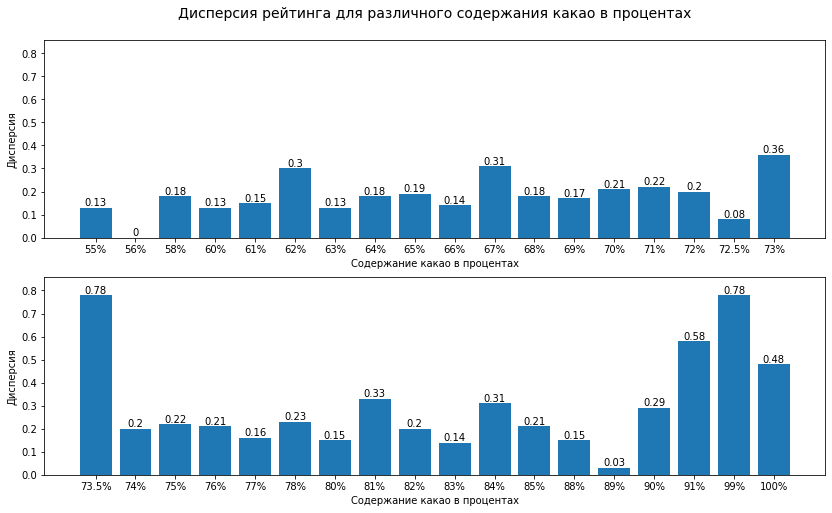

In [1250]:
cocoa_grouped_rating = df.groupby("Cocoa Percent")["Rating"]
cocoa_basis_var = cocoa_grouped_rating.var().dropna().round(2).sort_index(key = lambda x: x.str.slice(stop=-1).astype(float))

cocoa_basis_var_1, cocoa_basis_var_2 = np.array_split(cocoa_basis_var, 2)
fig, axes = plt.subplots(nrows=2)
fig.set_size_inches(14, 8)
axes[0].set_title('Дисперсия рейтинга для различного содержания какао в процентах\n', fontsize=14)
axes[0].set_ylim([0, cocoa_basis_var.values.max() + cocoa_basis_var.values.max() * 0.1])
axes[0].set(xlabel='Содержание какао в процентах', ylabel='Дисперсия')
axes[0].bar_label(axes[0].bar(cocoa_basis_var_1.index, cocoa_basis_var_1.values.round(2)));
axes[1].set_ylim([0, cocoa_basis_var.values.max() + cocoa_basis_var.values.max() * 0.1])
axes[1].set(xlabel='Содержание какао в процентах', ylabel='Дисперсия')
axes[1].bar_label(axes[1].bar(cocoa_basis_var_2.index, cocoa_basis_var_2.values.round(2)));

*__Этап 2.__ Рассчитаем размах рейтинга (Rating) для различного содержания какао в процентах (Cocoa Percent)*

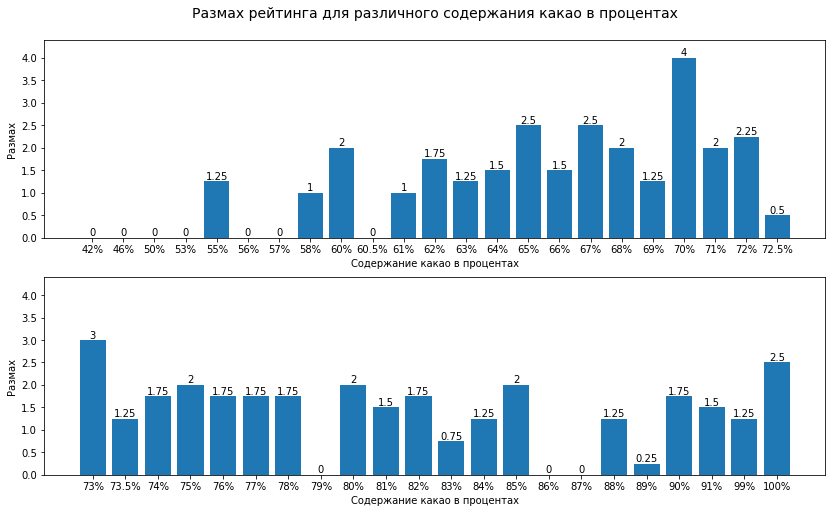

In [1251]:
cocoa_basis_minmax = (cocoa_grouped_rating.max() - cocoa_grouped_rating.min()).dropna().round(2).sort_index(key = lambda x: x.str.slice(stop=-1).astype(float))

cocoa_basis_minmax_1, cocoa_basis_minmax_2 = np.array_split(cocoa_basis_minmax, 2)
fig, axes = plt.subplots(nrows=2)
fig.set_size_inches(14, 8)
axes[0].set_title('Размах рейтинга для различного содержания какао в процентах\n', fontsize=14)
axes[0].set_ylim([0, cocoa_basis_minmax.values.max() + cocoa_basis_minmax.values.max() * 0.1])
axes[0].set(xlabel='Содержание какао в процентах', ylabel='Размах')
axes[0].bar_label(axes[0].bar(cocoa_basis_minmax_1.index, cocoa_basis_minmax_1.values.round(2)));
axes[1].set_ylim([0, cocoa_basis_minmax.values.max() + cocoa_basis_minmax.values.max() * 0.1])
axes[1].set(xlabel='Содержание какао в процентах', ylabel='Размах')
axes[1].bar_label(axes[1].bar(cocoa_basis_minmax_2.index, cocoa_basis_minmax_2.values.round(2)));